# **Project Name -Hotel Booking Analysis**

# **Problem Statement**

The goal of this project is to conduct an Exploratory Data Analysis (EDA) on a hotel dataset to uncover insights and trends within the data. This analysis aims to identify key patterns in customer behavior, booking trends, seasonal variations, and revenue sources. By visualizing and interpreting the data, we aim to provide actionable recommendations for improving hotel management and customer satisfaction. Additionally, this EDA will help highlight any data quality issues that need to be addressed for more accurate decision-making. The ultimate objective is to leverage data-driven insights to enhance the overall performance of the hotel.

# **Business Context**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Hotel Bookings.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.columns,len(data.columns)

(Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type',
        'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
        'company', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date'],
       dtype='object'),
 32)

In [ ]:
data.shape

(119390, 32)

Checking the information of the data columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data['children'].head(3)

0    0.0
1    0.0
2    0.0
Name: children, dtype: float64

In [ ]:
data.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
data['arrival_date_month'].head(3)

0    July
1    July
2    July
Name: arrival_date_month, dtype: object

In [ ]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
def check_what_in_column(column):
  print(column,"-->",data[column].unique())

In [ ]:
columns=data.columns
column_series=pd.Series(columns)

In [ ]:
for i in columns:
  check_what_in_column(i)

hotel --> ['Resort Hotel' 'City Hotel']
is_canceled --> [0 1]
lead_time --> [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

In [ ]:
data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
data['reservation_status_date'].sample(10)

90497    2016-06-08
53822    2016-06-02
19464    2015-12-28
77567    2015-09-23
38286    2017-07-14
46826    2015-11-14
75999    2015-07-06
81610    2015-12-15
21798    2016-03-11
108471   2017-03-28
Name: reservation_status_date, dtype: datetime64[ns]

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we should remvove the column companey as it contains almost 95% data is null where we also have to drop rows where agent having null value because here agent are basically the perosn who refred the hotel so we can't make any imputation about it

In [ ]:
data.drop(columns=['company'],axis=1,inplace=True)

In [ ]:
data.shape

(119390, 31)

In [ ]:
data.dropna(subset=['agent'], axis=0, inplace=True)

In [ ]:
data.shape

(103050, 31)

If the data is much crucial and critical then we most not impute any null value but here this missing value from children column and country column are less hence we can impute it

In [ ]:
data['children'].fillna(data['children'].mean(),axis=0,inplace=True)

In [ ]:
data['country'].fillna(data['country'].mode(),axis=0,inplace=True)

In [ ]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           154
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
data['country'].unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'DEU', 'FRA', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA',
       'LUX', 'NLD', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF',
       'CYM', 'ZMB', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN',
       'JAM', 'HRV', 'HKG', 'ISR', 'IRN', 'GEO', 'AND', 'GIB', 'URY',
       'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', nan,
       'SVK', 'AGO', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN',
       'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM',
       'JPN', 'LKA', 'CUB', 'CMR', 'MUS', 'COM', 'SUR', 'UGA', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'ISL', 'ECU', 'NPL', 'CPV', 'BHS',
       'MAC', 'TGO', 'TWN', 'DJI', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA',
       'KHM', 'M

In [ ]:
data['country']=np.where(data['country']!="nan",'NULL',data['country'])

In [ ]:
data['country'].fillna(data['country'].mode(),axis=0,inplace=True)

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Up to This we are cleaned and Transformed data

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050.000000,103050
mean,0.390044,111.672256,2016.156487,27.339427,15.784066,0.977875,2.589355,1.899466,0.111142,0.007686,0.014022,0.077215,0.024862,0.201698,86.693382,2.615614,104.618808,0.053217,0.605376,2016-07-29 01:32:57.222707456
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.800000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,2017-02-12 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487762,107.671497,0.706228,13.285191,8.793996,1.003935,1.905760,0.491053,0.411813,0.097016,0.117583,0.757682,0.436635,0.624792,110.774548,18.783482,50.034464,0.225717,0.799216,NaN


In [ ]:
data['hotel'].value_counts()

hotel
City Hotel      71199
Resort Hotel    31851
Name: count, dtype: int64

**from this we can state there is almost 70% of data from City Hotel and 30% from Resort Hotel**

In [ ]:
data.dtypes


hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
numercal_columns=data.select_dtypes(include=['int64','float64'])
numercal_columns.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
numercal_columns.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.278254,0.004315,0.004557,-0.005402,-0.023240,0.004442,0.037876,0.005409,-0.031974,-0.029883,0.118146,-0.043391,-0.131672,-0.083114,0.052519,0.023622,-0.188536,-0.257982
lead_time,0.278254,1.000000,0.040677,0.120472,-0.003494,0.048336,0.124929,0.073298,-0.049634,-0.021911,-0.055339,0.100451,-0.045930,-0.000303,-0.069741,0.170323,-0.111654,-0.111352,-0.123112
arrival_date_year,0.004315,0.040677,1.000000,-0.530490,0.005605,0.020733,0.032345,0.061511,0.065415,-0.009764,-0.022335,-0.134077,0.015265,0.036561,0.063457,-0.061588,0.222079,-0.012977,0.121600
arrival_date_week_number,0.004557,0.120472,-0.530490,1.000000,0.057489,0.010332,0.013572,0.003837,-0.000708,0.007854,-0.013073,0.042690,-0.025422,0.008506,-0.031201,0.023791,0.062731,-0.001386,0.021503
arrival_date_day_of_month,-0.005402,-0.003494,0.005605,0.057489,1.000000,-0.016503,-0.031063,0.001200,0.013563,-0.002400,-0.008268,-0.025005,0.001201,0.011458,0.001487,0.024802,0.025680,0.004582,0.002402
stays_in_weekend_nights,-0.023240,0.048336,0.020733,0.010332,-0.016503,1.000000,0.486529,0.071588,0.040147,0.020078,-0.056971,-0.002832,-0.028609,0.054920,0.140739,-0.064521,0.017026,-0.011077,0.056061
stays_in_week_nights,0.004442,0.124929,0.032345,0.013572,-0.031063,0.486529,1.000000,0.072459,0.039955,0.021007,-0.057406,-0.013370,-0.029795,0.081615,0.182382,-0.009302,0.036780,-0.016356,0.050248
adults,0.037876,0.073298,0.061511,0.003837,0.001200,0.071588,0.072459,1.000000,0.014657,0.013367,-0.073736,-0.003236,-0.055191,-0.051696,-0.035594,-0.022790,0.238001,0.036450,0.116924
children,0.005409,-0.049634,0.065415,-0.000708,0.013563,0.040147,0.039955,0.014657,1.000000,0.016753,-0.018959,-0.025078,-0.010186,0.055589,0.041066,-0.036412,0.335757,0.065300,0.068130
babies,-0.031974,-0.021911,-0.009764,0.007854,-0.002400,0.020078,0.021007,0.013367,0.016753,1.000000,-0.006895,-0.007149,-0.002678,0.094176,0.036184,-0.010877,0.025655,0.038931,0.091681


<Axes: >

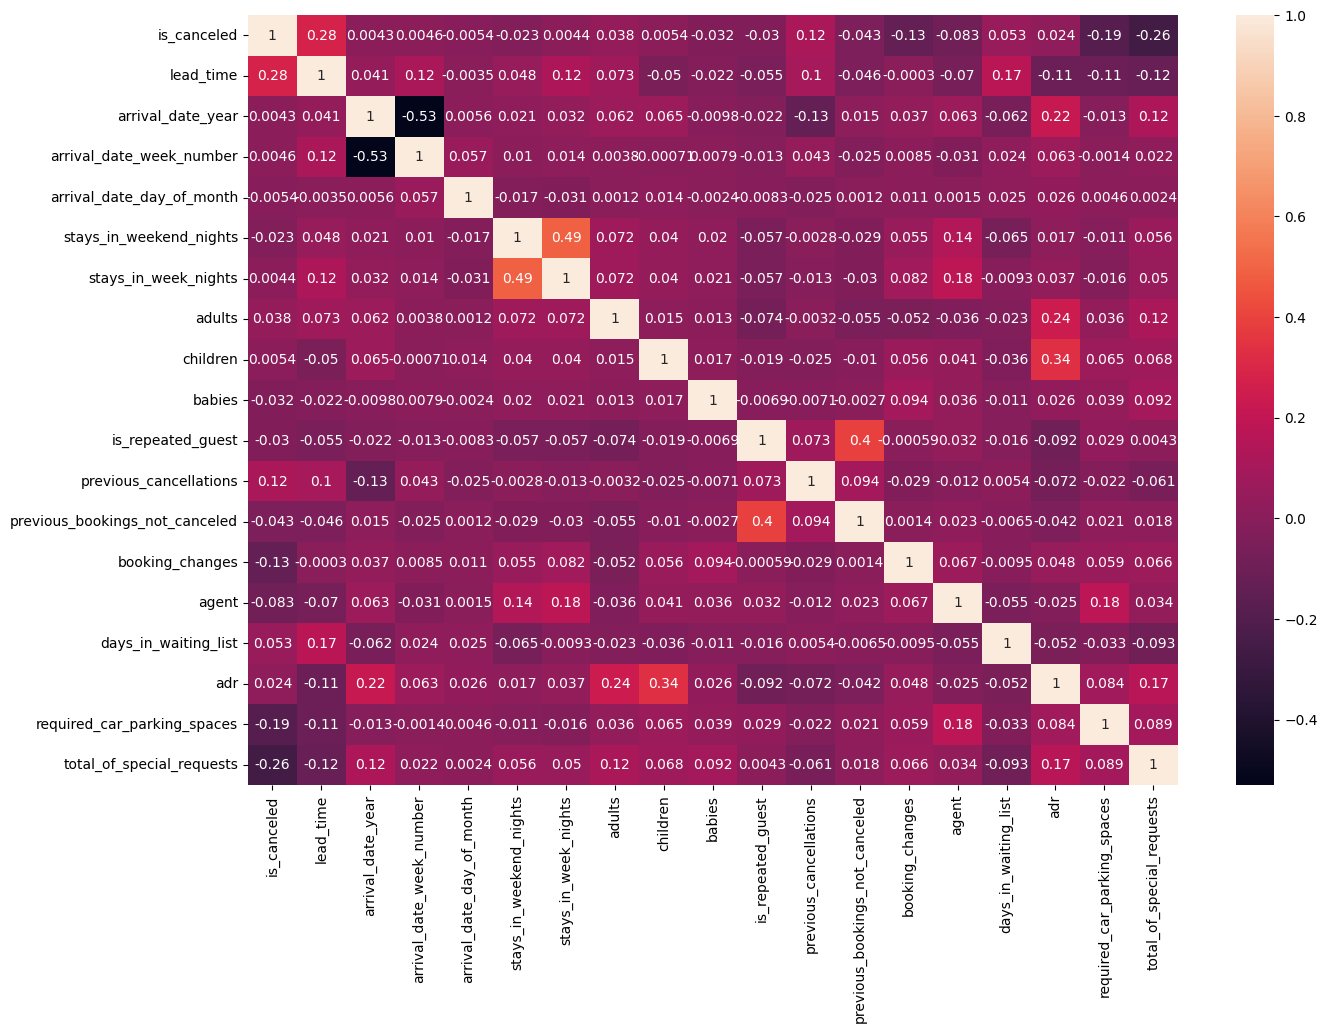

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numercal_columns.corr(),annot=True)

from this we can state that the some of the columns are strongly positive correlated and some of the negatively correlated

<BarContainer object of 103050 artists>

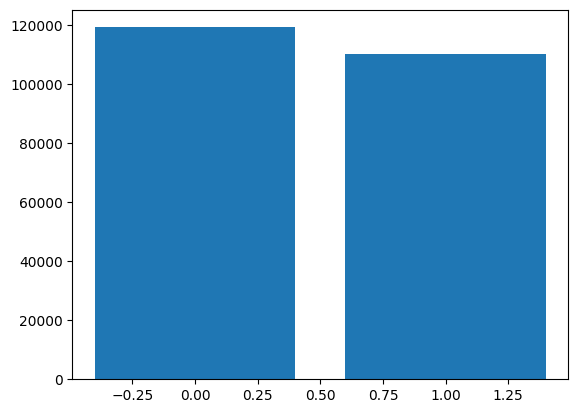

In [ ]:
plt.bar(x=data['is_canceled'].values,height=data['is_canceled'].index)

In [ ]:
data['arrival_date_year'].value_counts()

arrival_date_year
2016    49130
2017    35023
2015    18897
Name: count, dtype: int64

<BarContainer object of 3 artists>

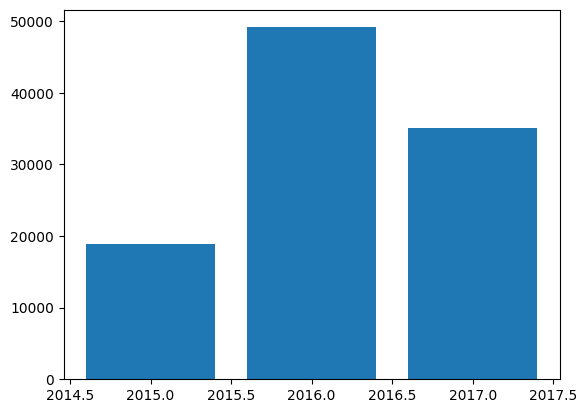

In [ ]:
plt.bar(data['arrival_date_year'].value_counts().index,data['arrival_date_year'].value_counts())

from this we can state that the order comming from the 2016 is more than any other year

<BarContainer object of 2 artists>

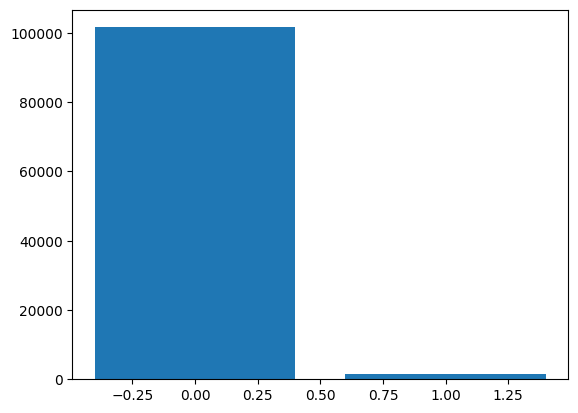

In [ ]:
plt.bar(data['is_repeated_guest'].value_counts().index,data['is_repeated_guest'].value_counts())

from this we can conclude that the almost 95% of the new customer comming to hotel is new and not old customers so according that we to chage our bussiness strategies

In [ ]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

<BarContainer object of 5 artists>

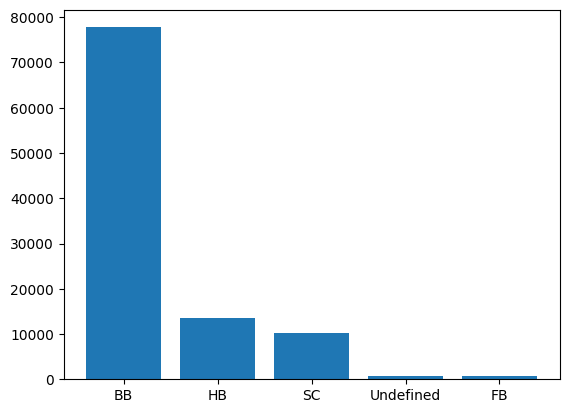

In [ ]:
plt.bar(data['meal'].value_counts().index,data['meal'].value_counts())

**from this we can state that BB is most famous meal where FB is least famous meal**

([<matplotlib.patches.Wedge at 0x7fcc1c046bc0>,
 [Text(-0.7918326363853393, 0.7635450713317735, 'Transient'),
  Text(0.6788911481754875, -0.865509566052836, 'Transient-Party'),
  Text(1.0871485037699717, -0.1676547963844521, 'Contract'),
  Text(1.09988320670739, -0.01602908615824815, 'Group')],
 [Text(-0.4319087107556396, 0.416479129817331, '75.6%'),
  Text(0.37030426264117494, -0.4720961269379105, '20.0%'),
  Text(0.592990092965439, -0.0914480707551557, '3.9%'),
  Text(0.5999362945676673, -0.00874313790449899, '0.5%')])

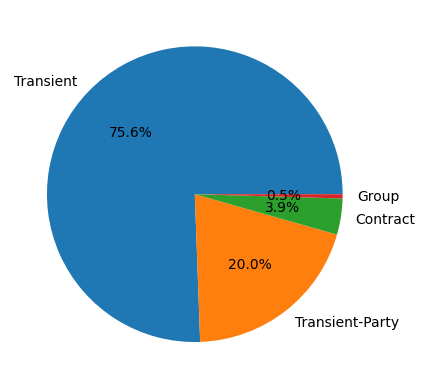

In [ ]:
plt.pie(data['customer_type'].value_counts(),labels=data['customer_type'].value_counts().index,autopct='%1.1f%%')

from this we can say that the Transient are 75% of them

In [ ]:
len(data['agent'].value_counts())

333

([<matplotlib.patches.Wedge at 0x7fcc1b2d4880>,
 [Text(-1.0645772508897193, 0.2769030098935145, 'TA/TO'),
  Text(1.052507167022641, -0.3197321744303739, 'Direct'),
  Text(1.0988192070339013, -0.050954393857530776, 'Corporate'),
  Text(1.0999805635202475, -0.006539103736674494, 'GDS'),
  Text(1.099999997963006, -6.694316269591279e-05, 'Undefined')],
 [Text(-0.5806785004853013, 0.15103800539646245, '91.9%'),
  Text(0.5740948183759859, -0.17439936787111301, '6.8%'),
  Text(0.5993559311094007, -0.02779330574047133, '1.1%'),
  Text(0.5999893982837713, -0.003566783856367905, '0.2%'),
  Text(0.5999999988889123, -3.651445237958879e-05, '0.0%')])

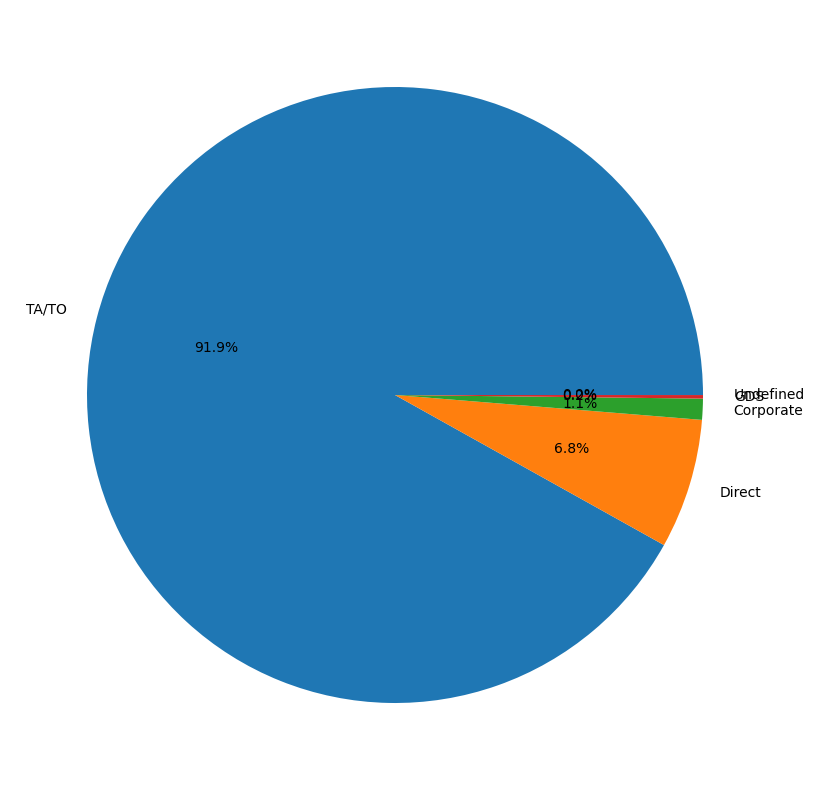

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(data['distribution_channel'].value_counts(),labels=data['distribution_channel'].value_counts().index,autopct='%1.1f%%')

almost 90% of the cutsomer are having booking as TA/TO

Text(0.5, 1.0, 'month wise count of customers')

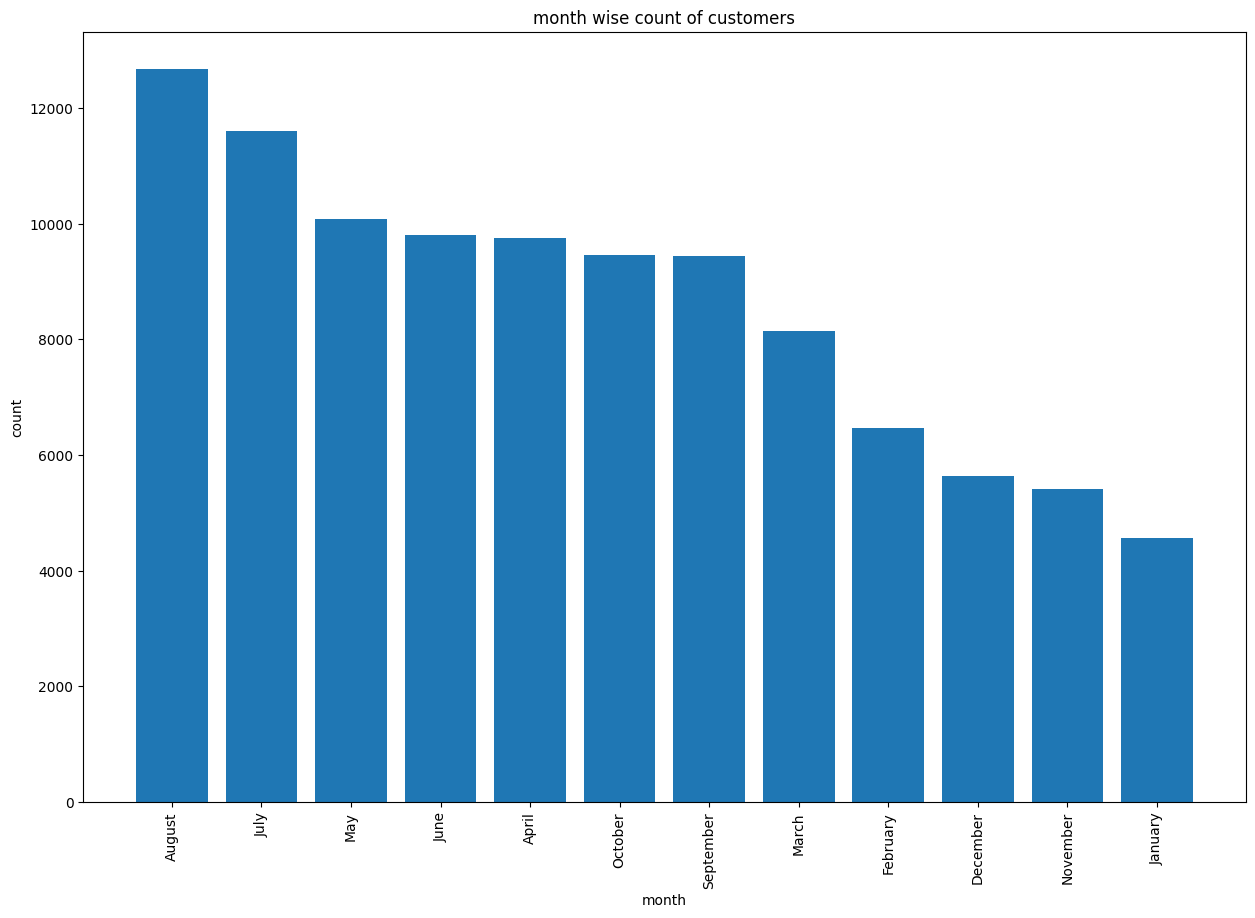

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(data['arrival_date_month'].value_counts().index,data['arrival_date_month'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('count')
plt.title('month wise count of customers')

from this we can state that the customers are comming more at the august,july,may  where to much less customers at the start of the year

([<matplotlib.patches.Wedge at 0x7fcc9a7a00a0>,
 [Text(-1.0848074364795282, 0.1821889836370866, '0'),
  Text(1.0846794285121903, -0.18294954868069144, '1'),
  Text(1.0999996545056472, -0.0008718299473734089, '2'),
  Text(1.099999995406079, -0.00010053171655245107, '3')],
 [Text(-0.5917131471706516, 0.09937580925659269, '94.7%'),
  Text(0.5916433246430128, -0.09979066291674077, '5.3%'),
  Text(0.5999998115485348, -0.00047554360765822293, '0.0%'),
  Text(0.599999997494225, -5.48354817558824e-05, '0.0%')])

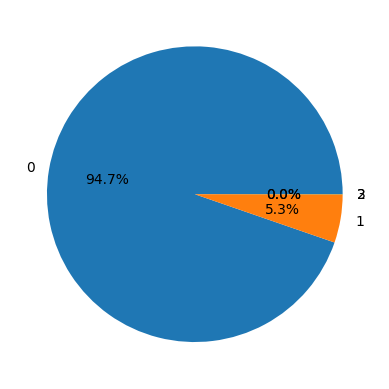

In [ ]:
plt.pie(data['required_car_parking_spaces'].value_counts(),labels=data['required_car_parking_spaces'].value_counts().index,autopct='%1.1f%%')

from this we can state that around the 95 % don't go for the parking only 5% customers go for parking from this we can change and take bussiness decisions

In [ ]:
weekend=data['stays_in_weekend_nights'].sum()
weekday=data['stays_in_week_nights'].sum()

In [ ]:
day_df=pd.DataFrame({'weekend':[weekend],'weekday':[weekday]})
day_df

,weekend,weekday
0,100770,266833


In [ ]:
day_df_transposed=day_df.transpose()
day_df_transposed

,0
weekend,100770
weekday,266833


<BarContainer object of 2 artists>

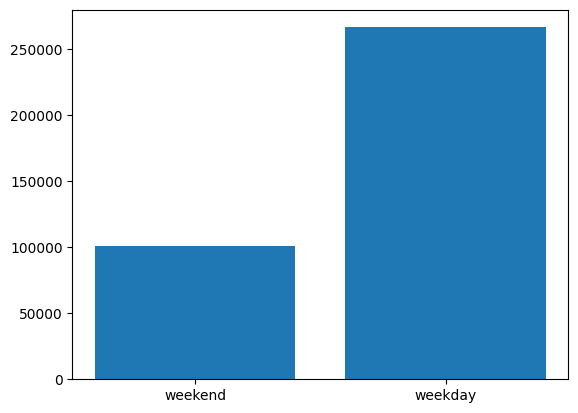

In [ ]:
plt.bar(day_df_transposed.index,day_df_transposed[0])

from this we can state that the customers stary in hotel when it is weekdays where not much in that of the weekend

# **Conclusion**

In conclusion, this EDA has provided valuable insights into the hotel's operations, customer behavior, and revenue patterns. These findings can guide data-driven decision-making to optimize hotel performance, enhance customer experiences, and drive business growth. Implementing the recommendations based on these insights will likely result in improved operational efficiency and increased profitability.